This notebook has been inspired by [Q* Learning with FrozenLakev2.ipynb](https://colab.research.google.com/github/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q_Learning_with_FrozenLakev2.ipynb#scrollTo=Xr9nI6dcQM8I) and [Deep Reinforcement Learning Course](https://huggingface.co/learn/deep-rl-course/unit0/introduction?fw=pt) by Thomas Simonini

# Day 3 : Policy Iteration Algorithm

In [ ]:
import numpy as np
import gym
import random

## Policy Iteration Algorithm


Policy Iteration Algorithm works by alternating between evaluating the existing policy and making the policy greedy with respect to the existing value function. It consists of three steps:

1. Initialization: initialize the value function as well as the policy (randomly).
2. Policy Evaluation: uses the Bellman equation as an update rule to iteratively construct the value function.
3. Policy Improvement: chooses the policy that maximizes the value function of the original policy (greedy).

A pseudocode for the algorithm is given below from the textbook Reinforcement Learning: An Introduction, by Richard S. Sutton and Andrew G. Barto.



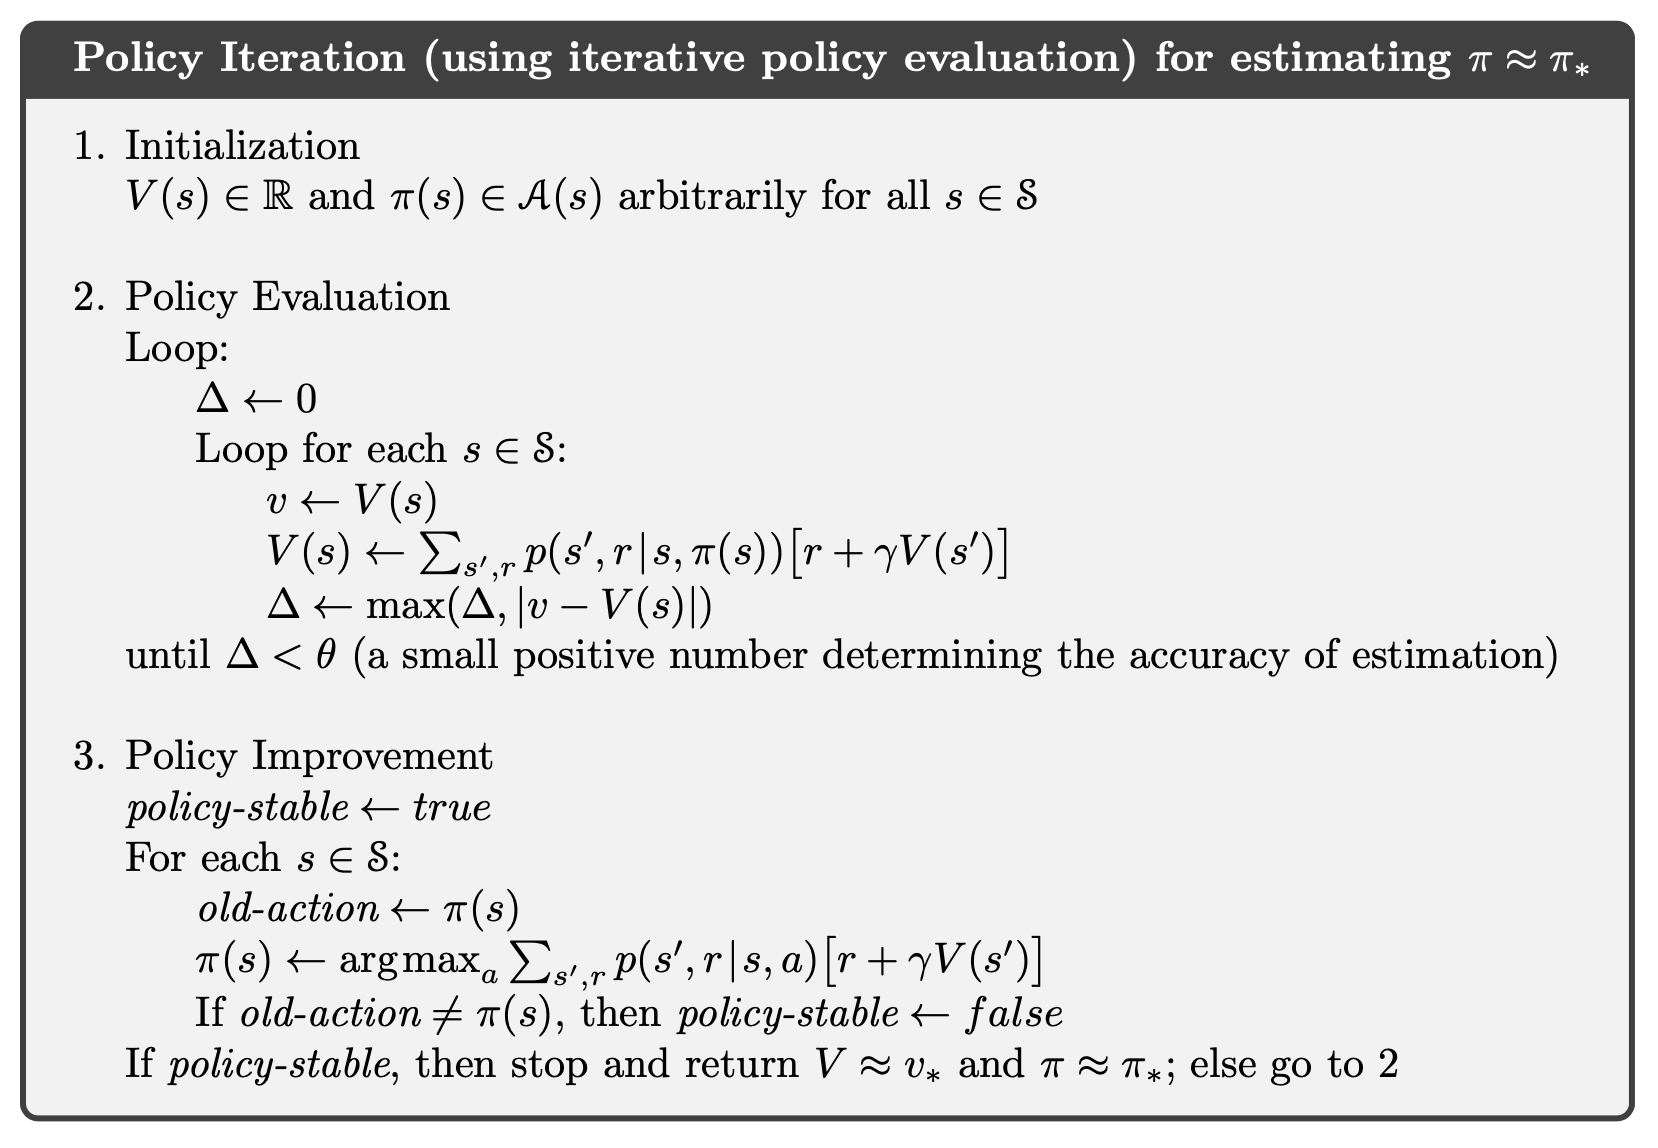



# Policy Iteration Algorithm on Gridwold Example

We will start with the gridworld example explained in class.

 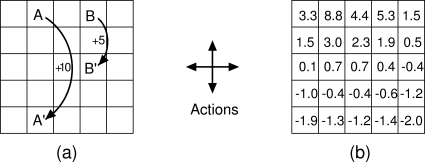

The starting state is s0 (top-left corner), and the goal state is s8 (bottom-right corner).

The dynamics of the MDP are as follows:



1.   If you choose the "Move right" action, you will transition to the state on your right (if it is a valid state). If the current state is on the right-most column (s2, s5, or s8), you will remain in the same state.

2.   If you choose the "Move down" action, you will transition to the state below you (if it is a valid state). If the current state is on the bottom row (s6, s7, or s8), you will remain in the same state.



The rewards for this MDP can be defined as follows:



1.   If you reach the goal state (s8), you receive a reward of +10.

2.   If you move into any other state, you receive a reward of 0.


The MDP is episodic, meaning that once you reach the goal state, the episode ends, and a new episode starts from the initial state.

## Implementation of Policy Iteration

In [ ]:
class GridworldEnvironment:
    def __init__(self):
        self.grid_world = np.zeros((5, 5))
        self.grid_world[4, 1] = 10  # Position A
        self.grid_world[2, 3] = 5   # Position B
        self.current_state = (0, 0)

        self.actions = ['up','down','left','right']
        self.states = np.array([(i, j) for i in range(self.grid_world.shape[0]) for j in range(self.grid_world.shape[1]) if self.grid_world[i, j] == 0])


    def step(self, state, action):
        i, j = state
        if action == 'up':
            next_state = (i - 1, j)
        elif action == 'down':
            next_state = (i + 1, j)
        elif action == 'left':
            next_state = (i, j - 1)
        elif action == 'right':
            next_state = (i, j + 1)
        else:
            raise ValueError()

        if next_state == (0, 1):
            next_state = (4, 1)  # Transition to position A
            reward = 10
        elif next_state == (0, 3):
            next_state = (2, 3)  # Transition to position B
            reward = 5
        elif next_state[0] < 0 or next_state[0] >= 5 or next_state[1] < 0 or next_state[1] >= 5:
            # Stay at the same position if action moves outside the grid
            next_state = self.current_state
            reward = -1
        else:
            reward = 0

        #self.current_state = next_state
        next_state = (next_state[0], next_state[1])
        return next_state, reward

def num_action_to_text(action):
    if action == 0:
        return 'right'
    elif action == 1:
        return 'down'
    elif action == 2:
        return 'left'
    elif action == 3:
        return 'up'
    else:
        raise ValueError()

def text_action_to_num(action):
    if action == 'right':
        return 0
    elif action == 'down':
        return 1
    elif action == 'left':
        return 2
    elif action == 'up':
        return 3
    else:
        raise ValueError()


In [ ]:
# Create an instance of the GridworldEnvironment
env = GridworldEnvironment()

# Take a step in the environment
action = 'right'
state = (0, 0)
next_state, reward = env.step(state, action)

print("Next State:", next_state)
print("Reward:", reward)


Next State: (4, 1)
Reward: 10


In [ ]:
# Policy evaluation
def evaluate_policy(grid, V, pi, gamma, theta):
    """
    Applies the policy evaluation algorithm.
    Args:
        grid (Gridworld): gridworld environment
        V (array): numpy array representing the value function
        pi (array): numpy array representing the policy
        gamma (float): gamma parameter (between 0 and 1)
        theta (float): threshold parameter that defines when the change in the value function is negligible
    """

    state_size = grid.states.shape[0]
    action_size = len(grid.actions)

    delta = float('inf')
    while delta > theta:
        delta = 0
        for s in grid.states:
            i, j = s
            current_s = (i, j)
            v = V[current_s]
            bellman_update(grid, V, pi, current_s, gamma)
            delta = max(delta, abs(v - V[current_s]))
    return V

def bellman_update(grid, V, pi, s, gamma):
    """Mutate V according to the Bellman update equation."""


In [ ]:
def evaluate_policy_on_grid_world(policy, num_episodes=1000, steps=100):
    rewards = []
    for _ in range(num_episodes):
        env = GridworldEnvironment()
        state = env.current_state
        episode_reward = 0
        for _ in range(steps):
            row, col = state
            action = policy[row, col]
            next_state, reward = env.step(state, action)
            episode_reward += reward
            state = next_state
        rewards.append(episode_reward)
    return sum(rewards) / num_episodes

In [ ]:
# Policy improvement
def improve_policy(grid, V, pi, gamma):
    """
    Applies the Policy Improvement step.
    Args:
        grid (Gridworld): gridworld environment
        V (array): numpy array representing the value function
        pi (array): numpy array representing the policy
        gamma (float): gamma parameter (between 0 and 1)
    """
    policy_stable = True
    policy = np.random.choice(grid.actions, size=(5, 5))

    for s in grid.states:
        old_a = pi[s].copy()
        q_greedify_policy(grid, V, pi, policy, s, gamma)

        if not np.array_equal(pi[s], old_a):
            policy_stable = False

    return pi, policy, policy_stable

def q_greedify_policy(grid, V, pi, policy, s, gamma):
    """Mutate pi to be greedy with respect to the q-values induced by V."""


In [ ]:
# Policy iteration
def policy_iteration(grid, gamma, theta):
    V = np.ones((5, 5), dtype=float)
    pi = np.ones((grid.states.shape[0], len(grid.actions))) / len(grid.actions)
    policy_stable = False

    while not policy_stable:
        V = evaluate_policy(grid, V, pi, gamma, theta)
        pi, policy, policy_stable = improve_policy(grid, V, pi, gamma)

    return V, pi, policy


In [ ]:
gamma = 0.9
theta = 1e-6

# Policy Iteration Algorithm
V, pi, policy = policy_iteration(env, gamma, theta)


print("The policy using Policy Iteration Algorithm:")
policy

The policy using Policy Iteration Algorithm:


array([['right', 'down', 'left', 'left', 'up'],
       ['up', 'up', 'up', 'left', 'right'],
       ['up', 'up', 'up', 'up', 'right'],
       ['left', 'up', 'up', 'down', 'right'],
       ['down', 'up', 'down', 'down', 'down']], dtype='<U5')

In [ ]:
pi

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
evaluate_policy_on_grid_world(policy)

250.0

# Policy Iteration Algorithm on 2D Frozen Lake

## OpenAI Gym

[OpenAI Gym](https://www.gymlibrary.dev/) is a toolkit for developing and comparing reinforcement learning (RL) algorithms. It consists of a growing suite of environments (from simulated robots to Atari games), and a site for comparing and reproducing results. OpenAI Gym provides a diverse suite of environments that range from easy to difficult and involve many different kinds of data.

Creating and Interacting with gym environments is very simple.

```
import gym
env = gym.make("CartPole-v1")
observation, info = env.reset(seed=42)

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()
```

Following are the definitions of some common terminologies used.

**Reset:** Resets the environment to an initial state and returns the initial observation. <br>
**Step:** Run one timestep of the environment's dynamics.<br>
**Observation:** The observed state of the environment.<br>
**Action:** An action provided by the agent.<br>
**Reward:** The amount of reward returned as a result of taking the action.<br>
**Terminated:** Whether a terminal state (as defined under the MDP of the task) is reached.<br>
**Truncated:** Whether a truncation condition outside the scope of the MDP is satisfied. Typically a timelimit, but could also be used to indicate agent physically going out of bounds.<br>
**Info:** This contains auxiliary diagnostic information (helpful for debugging, learning, and logging).<br>
**Action Space:** This attribute gives the format of valid actions. It is of datatype Space provided by Gym. For example, if the action space is of type Discrete and gives the value Discrete(2), this means there are two valid discrete actions: 0 & 1.<br>
**Observation:** This attribute gives the format of valid observations. It is of datatype Space provided by Gym. For example, if the observation space is of type Box and the shape of the object is (4,), this denotes a valid observation will be an array of 4 numbers.<br>

Note: Previously, `terminated` and `truncated` used to be merged under one variable `done`. <br>


We will use OpenAI Gym for Frozen Lake (2D) and Cart Pole (1D) environments.

Frozen lake is a toy text environment involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. <br>

We can also set the lake to be slippery so that the agent does not always move in the intended direction. \but here, we will only look at the non-slippery case. But you are welcome to try the slippery one.<br>

You can read more about the environment [here](https://gymnasium.farama.org/environments/toy_text/frozen_lake/).

![Frozen Lake](https://gymnasium.farama.org/_images/frozen_lake.gif)


|   |   |
|---|---|
| Action Space | Discrete(4) |
| Observation Space | Discrete(16) |
| Import | `gym.make("FrozenLake-v1")` |


Frozen lake involves crossing a frozen lake from Start(S) to Goal(G) without falling into any Holes(H)
by walking over the Frozen(F) lake.
The agent may not always move in the intended direction due to the slippery nature of the frozen lake.


### Action Space
The agent takes a 1-element vector for actions.
The action space is `(dir)`, where `dir` decides direction to move in which can be:

- 0: LEFT
- 1: DOWN
- 2: RIGHT
- 3: UP

### Observation Space
The observation is a value representing the agent's current position as
current_row * nrows + current_col (where both the row and col start at 0).
For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15.
The number of possible observations is dependent on the size of the map.
For example, the 4x4 map has 16 possible observations.

### Rewards

Reward schedule:
- Reach goal(G): +1
- Reach hole(H): 0
- Reach frozen(F): 0

### Arguments

```
gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
```

`desc`: Used to specify custom map for frozen lake. For example,

    desc=["SFFF", "FHFH", "FFFH", "HFFG"].

    A random generated map can be specified by calling the function `generate_random_map`. For example,

    ```
    from gym.envs.toy_text.frozen_lake import generate_random_map

    gym.make('FrozenLake-v1', desc=generate_random_map(size=8))
    ```

`map_name`: ID to use any of the preloaded maps.

    "4x4":[
        "SFFF",
        "FHFH",
        "FFFH",
        "HFFG"
        ]

    "8x8": [
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG",
    ]

`is_slippery`: True/False. If True will move in intended direction with
probability of 1/3 else will move in either perpendicular direction with
equal probability of 1/3 in both directions.

    For example, if action is left and is_slippery is True, then:
    - P(move left)=1/3
    - P(move up)=1/3
    - P(move down)=1/3


In [ ]:
pip install gym==0.26.2

## Implementation of Policy Iteration

In [ ]:
# Policy evaluation
def evaluate_policy(env, V, pi, gamma, theta):
    """Applies the policy evaluation algorithm.
    Args:
        env (Environment): gridworld environment
        V (array): numpy array representing the value function
        pi (array): numpy array representing the policy
        gamma (float): gamma parameter (between 0 and 1)
        theta (float): threshold parameter that defines when the change in the value function is negligible
    """

    state_size = env.observation_space.n

    delta = float('inf')
    while delta > theta:
        delta = 0
        for s in range(state_size):
            v = V[s]
            bellman_update(env, V, pi, s, gamma)
            delta = max(delta, abs(v - V[s]))
    return V


def bellman_update(env, V, pi, s, gamma):
    """Mutate V according to the Bellman update equation."""


In [ ]:
# Function to evaluate a policy in an environment
def get_average_reward_of_policy(env, policy, num_episodes=1000):
    rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        episode_reward = 0
        done = False
        while not done:
            action = np.argmax(policy[state,:])
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            episode_reward += reward
            state = next_state
        rewards.append(episode_reward)
    return sum(rewards) / num_episodes

In [ ]:
# Policy improvement
def improve_policy(env, V, pi, gamma):
    """Applies the Policy Improvement step.
    Args:
        env (Environment): gridworld environment
        V (array): numpy array representing the value function
        pi (array): numpy array representing the policy
        gamma (float): gamma parameter (between 0 and 1)
    """
    policy_stable = True
    state_size = env.observation_space.n

    for s in range(state_size):
        old = pi[s].copy()
        q_greedify_policy(env, V, pi, s, gamma)

        if not np.array_equal(pi[s], old):
            policy_stable = False

    return pi, policy_stable


def q_greedify_policy(env, V, pi, s, gamma):
    """Mutate pi to be greedy with respect to the q-values induced by V."""


In [ ]:
# Policy iteration
def policy_iteration(env, gamma, theta):
    state_size = env.observation_space.n
    action_size = env.action_space.n

    V = np.zeros(state_size)
    pi = np.ones((state_size, action_size)) / action_size
    policy_stable = False

    while not policy_stable:
        V = evaluate_policy(env, V, pi, gamma, theta)
        pi, policy_stable = improve_policy(env, V, pi, gamma)

    return V, pi

In [ ]:
# Create the environment
env_2d = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")

state_size = env_2d.observation_space.n
action_size = env_2d.action_space.n


In [ ]:
gamma = 0.9
theta = 1e-6

V = np.ones(state_size)
pi = np.ones((state_size, action_size))/action_size

# Policy Iteration Algorithm
V, pi = policy_iteration(env_2d, gamma, theta)

print("The policy using Policy Iteration Algorithm:")
print(pi)

The policy using Policy Iteration Algorithm:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [ ]:
get_average_reward_of_policy(env_2d, pi)

1.0

## Visualization

In [ ]:
# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob
import base64, io, os

os.environ['SDL_VIDEODRIVER']='dummy'

In [ ]:
os.makedirs("video", exist_ok=True)

def show_video(env_name):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(env_name, env, policy, max_steps=10000):
    state, _ = env.reset()
    vid = video_recorder.VideoRecorder(env, path="video/{}.mp4".format(env_name))

    done = False
    for t in range(max_steps):
        vid.capture_frame()
        action = np.argmax(policy[state, :])
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        print(f"state: {state}, action: {action}",next_state, reward, done)
        state = next_state
        if done:
            break
    vid.close()
    env.close()

In [ ]:
show_video_of_model("lake1", env_2d, pi, max_steps=1000)

state: 0, action: 1 4 0.0 False
state: 4, action: 1 8 0.0 False
state: 8, action: 2 9 0.0 False
state: 9, action: 1 13 0.0 False
state: 13, action: 2 14 0.0 False
state: 14, action: 2 15 1.0 True
Moviepy - Building video video/lake1.mp4.
Moviepy - Writing video video/lake1.mp4



Moviepy - Done !
Moviepy - video ready video/lake1.mp4


In [ ]:
show_video("lake1")